### About:
5/11/2021 Program calculate the correlation coefficient between state and age population in 2019

    (1) between internet speeds
    (2) between states
    (3) between states & internet speeds??? -> Self Assigned

#### NOTE: Make sure to unzip the xlsx files

@author: Minh Nguyen @AIA

@credit: Qasim, Andrei @AIA

In [1]:
import numpy as np
from numpy.random import randn
from numpy.random import seed
from numpy import array_split
import pandas as pd
from sklearn import metrics as mt
from sklearn import model_selection as md
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.datasets as ds
import random

### Correlation Calculation

In [2]:
def correlation_cal(df):
    # Instead of just dropping the missing values, we will fill in N/A values
    if df.isna().values.any():
        while True:
            missing_type = input("Please enter the type of missing value replacement: mean, medium, mode, or drop from the row")
            missing_type = missing_type.lower()
            if(missing_type in ['mean', 'median', 'mode', 'drop']):
                if(missing_type == 'mean'):
                    df.fillna(df.mean(), inplace=True)
                elif(missing_type == 'median'):
                    df.fillna(df.median(), inplace=True)
                elif(missing_type == 'mode'):
                    df.fillna(df.mode(), inplace=True)
                else:
                    df.dropna()
                break
            else:
                print("Please input the option from the list")
    
    # Calculate input data correlation
    while True:
        corr_type = input("Please enter type of correlation: Pearson, Spearman, or Kendall: ")
        corr_type = corr_type.lower()
        if corr_type in ['pearson', 'spearman', 'kendall']:
            break
        else:
            print("Please try again")
    
    # Plot correlation matrix
    corrMatrix = df.corr(method=corr_type)
    _, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corrMatrix, ax = ax, cmap="YlGnBu", linewidths = 0.1) # cmap can also be "YlGnBu"

# (1) Correlation Calculation Between Population Range

#### Preprocess Data

In [3]:
!ls

Correlation-2008.ipynb
Correlation-2009.ipynb
Correlation-2010.ipynb
Correlation-2011.ipynb
Correlation-2012.ipynb
Correlation-2013.ipynb
Correlation-2014.ipynb
Correlation-2015.ipynb
Correlation-2016.ipynb
Correlation-2017.ipynb
Correlation-2018.ipynb
Correlation-2019.ipynb
Original Dataset
preprocessed_data.xlsx
sheet.xlsx


In [4]:
def parse_data_bis(file, sheetname):
    """ Function load csv files into csv pandas by internet speed 
        Function parse data by internet speed for all 50 states + nation (row 0)
    """
    dataset = pd.read_excel(file, sheet_name = sheetname, skiprows = [51,52,53,54,55,56,57,58,59,60,61,62], usecols=[1,2,3,4,5,6,7])
    return dataset

In [5]:
df_bis = parse_data_bis("sheet.xlsx", "2019") # Due to long name access, I made a copy of preprocessed_data.xlsx and change to sheet

In [6]:
df_bis.head()

,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total
0,1128100,414500,549500,1195300,645000,834700,4767100
1,181700,65300,97500,172900,92800,91500,701700
2,1701600,656800,860500,1708100,877500,1293600,7098000
3,720800,253500,335600,723700,383200,505700,2922500
4,9171300,3539800,5288800,10152200,4751600,5739000,38642700


### Run 1: Correlation Pearson - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Pearson


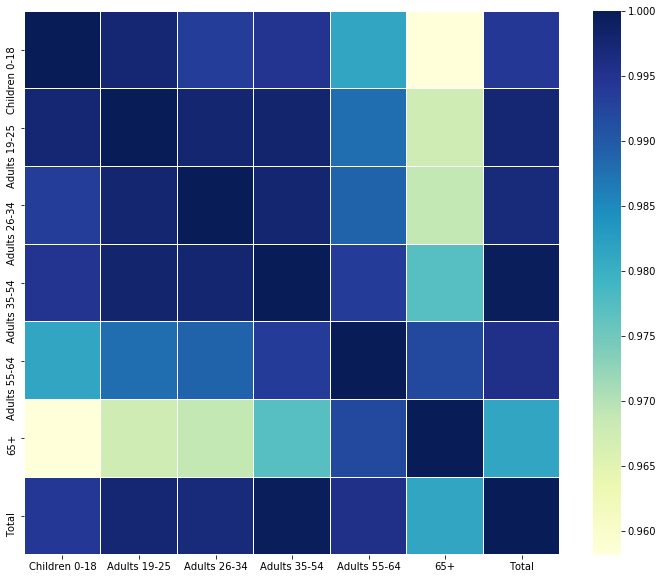

In [7]:
# Run Correlation Pearson
correlation_cal(df_bis)

### Run 2: Correlation Spearman - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Spearman


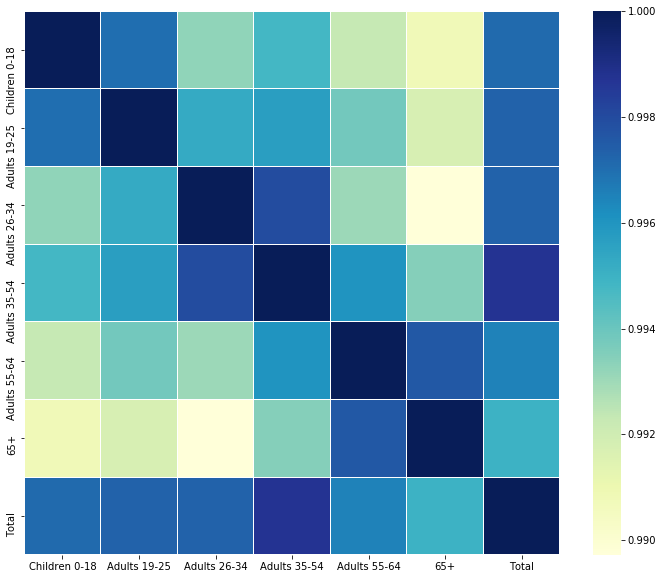

In [8]:
# Run Correlation Spearman
correlation_cal(df_bis)

### Run 3: Correlation Kendall - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Kendall


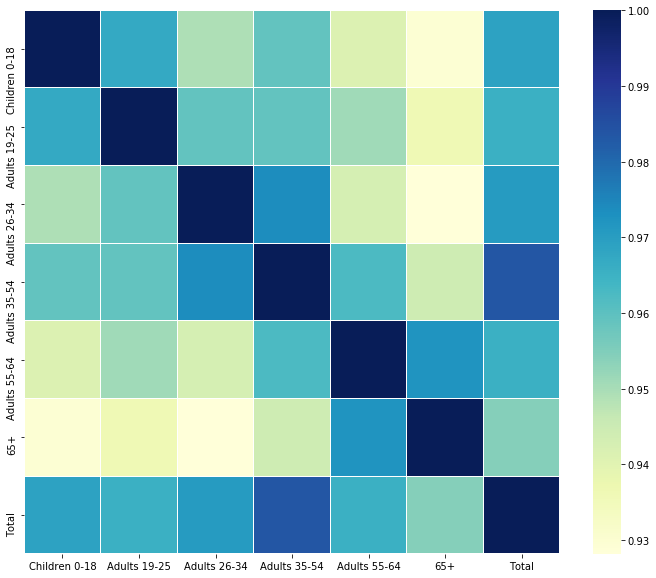

In [9]:
# Run Correlation Kendall
correlation_cal(df_bis)

### Analysis - Self Assigned

1/ What are the two significant correlation coefficient for Pearson, Spearman, Kendall?

2/ What are other analysis we can do with these graphs?

3/ Any other metric besides Pearson, Spearman, Kendall?

# (2) Correlation Calculation Between States

In [10]:
def parse_data_bs(file, sheetname):
    """ Function load csv files into csv pandas by internet speed 
        Function parse data by states and nation for all 10 types of internet speeds
    """
    dataset = pd.read_excel(file, sheet_name = sheetname, skiprows=[0,51,52,53,54,55,56,57,58,59,60,61,62], usecols=[0,1,2,3,4,5,6,7], drop=True)
    dataset.set_index("Alabama", inplace=True)
    dataset = dataset.T
    
    return dataset

In [12]:
df_bs = parse_data_bs("sheet.xlsx", "2019")

In [13]:
df_bs.head()

Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1128100,181700,1701600,720800,9171300,1294400,748700,205400,4376700,2602500,305800,...,219100,1560800,7688200,971200,116400,1917000,1707100,368000,1307500,141500
414500,65300,656800,253500,3539800,498900,297800,75900,1680200,917200,96200,...,70100,574000,2647900,342700,51200,684600,619900,140600,483000,46800
549500,97500,860500,335600,5288800,792000,390500,111000,2399400,1252700,155600,...,98100,820300,3687100,414800,66400,981000,1028200,182300,658400,65800
1195300,172900,1708100,723700,10152200,1488600,895300,227200,5236000,2744000,342900,...,199900,1687000,7375600,764200,147900,2165300,1926900,437000,1423000,136100
645000,92800,877500,383200,4751600,706600,510600,135700,2872900,1284300,177500,...,115900,890200,3233100,300000,94400,1104300,954000,254000,813700,75700


### Run 1: Correlation Pearson - Mean


Please enter type of correlation: Pearson, Spearman, or Kendall: Pearson


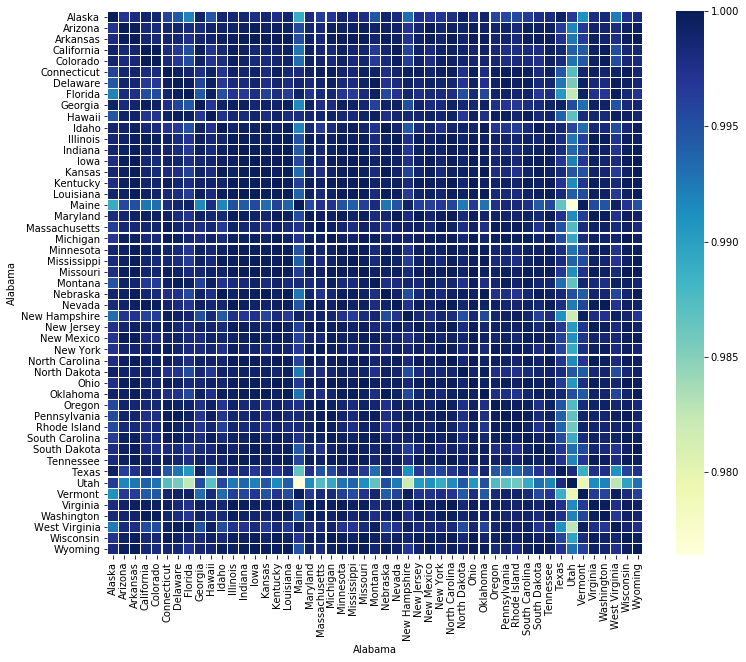

In [14]:
# Run Correlation Pearson
correlation_cal(df_bs)

### Run 2: Correlation Spearman - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Spearman


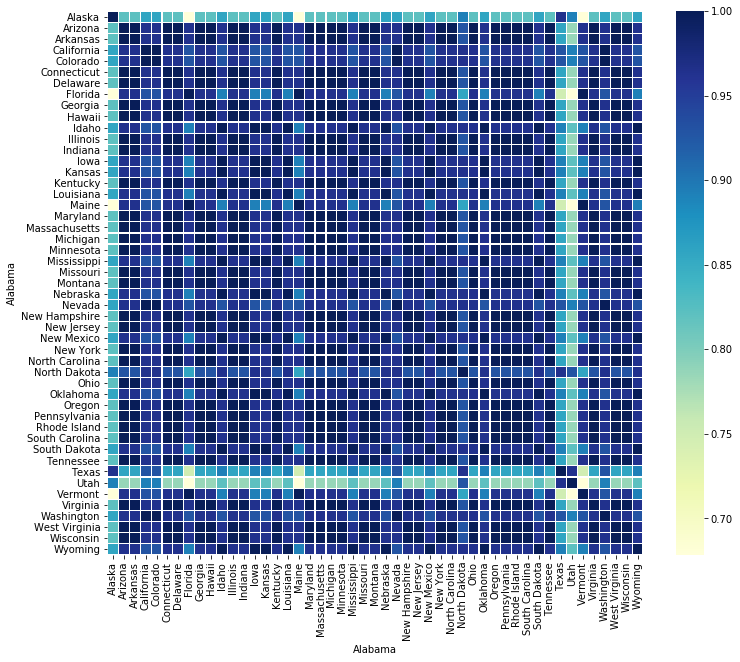

In [15]:
# Run Correlation Spearman
correlation_cal(df_bs)

### Run 3: Correlation Kendall - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Kendall


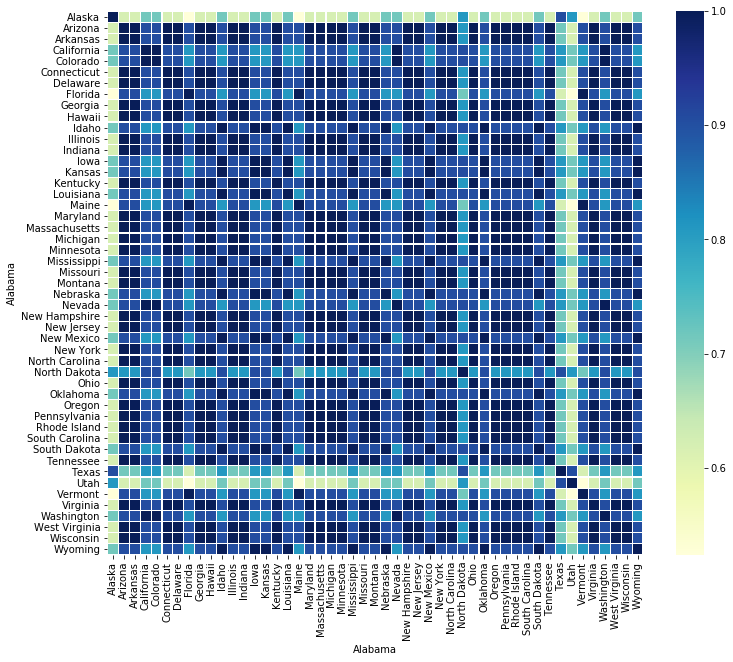

In [16]:
# Run Correlation Kendall
correlation_cal(df_bs)

### Analysis - Self Assigned

1/ What are the two significant correlation coefficient for Pearson, Spearman, Kendall?

2/ What are other analysis we can do with these graphs?

3/ Any other metric besides Pearson, Spearman, Kendall?